In [1]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [4]:
input_data=np.load("gradient_emo.npy")
label=np.load("label_landmark.npy")

In [5]:
label.shape
input_data.shape

(35528, 59)

In [6]:
input_data[0]

array([-0.1466  , -0.1267  ,  8.5     ,  3.666   ,  1.728   ,  0.8237  ,
        1.462   ,  0.8184  , -0.      ,  0.02    ,  0.02    , -1.143   ,
       -1.409   , -2.666   , -5.668   ,  0.1466  , -0.3572  , -0.      ,
        0.625   ,  1.      , -0.6665  , -0.013336, -2.      , -1.375   ,
        1.75    ,  1.444   , -0.08    ,  0.6     ,  1.      ,  1.      ,
        0.      , -0.375   ,  0.8335  , -0.06    ,  0.      ,  1.      ,
       -0.6     , -0.      , -1.      , -0.      ,  0.02    , -0.579   ,
       -0.1765  ,  1.5     ,  0.6665  , -0.75    , -1.272   , -4.668   ,
       -1.667   ,  0.      ,  0.5     ,  3.666   , -0.3333  ,  0.5     ,
       -0.02    , -1.      , -0.0733  ,  0.      ,  0.6     ],
      dtype=float16)

In [7]:
input_data[10001]

array([ 7.332 ,  1.714 ,  3.75  ,  1.546 ,  1.8   ,  2.75  ,  0.3   ,
        0.636 , -0.3333, -0.5557, -0.3809, -1.214 , -2.572 , -2.25  ,
       -5.668 , -3.143 , -4.668 , -0.3635, -0.    , -0.    , -0.4   ,
       -0.    ,  0.5   ,  1.286 , -5.25  , -7.332 , -0.0933,  0.75  ,
        1.333 , -0.5713, -0.    , -1.    , -0.    ,  0.636 , -0.4285,
        0.    , -0.7   , -0.    ,  1.    , -0.2727,  0.    , -1.    ,
       -0.4285,  0.4285, -0.    , -0.    , -0.    , -2.    , -0.3635,
        0.    ,  0.5713,  0.4285, -0.    ,  0.75  , -0.    , -0.389 ,
       -0.389 ,  0.    ,  0.4285], dtype=float16)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(input_data, label, test_size=0.3, 
                     stratify=label,
                     random_state=0)

In [9]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=55),
                        LogisticRegression(solver='liblinear', random_state=1))

pipe_lr.fit(X_train_std, y_train)
y_pred = pipe_lr.predict(X_test_std)
print('테스트 정확도: %.3f' % pipe_lr.score(X_test_std, y_test))

테스트 정확도: 0.371


In [19]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
    

kfold = StratifiedKFold(n_splits=10, shuffle=True,
                        random_state=1).split(X_train, y_train)

scores = []
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print('폴드: %2d, 클래스 분포: %s, 정확도: %.3f' % (k+1,
          np.bincount(y_train[train]), score))
    
print('\nCV 정확도: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

폴드:  1, 클래스 분포: [3086  343 3179 5634 3876 3764 2500], 정확도: 0.383
폴드:  2, 클래스 분포: [3086  343 3179 5634 3876 3764 2500], 정확도: 0.366
폴드:  3, 클래스 분포: [3085  343 3179 5634 3876 3765 2500], 정확도: 0.371
폴드:  4, 클래스 분포: [3085  343 3180 5634 3875 3765 2500], 정확도: 0.377
폴드:  5, 클래스 분포: [3085  343 3180 5634 3875 3765 2500], 정확도: 0.372
폴드:  6, 클래스 분포: [3085  343 3180 5634 3875 3765 2500], 정확도: 0.364
폴드:  7, 클래스 분포: [3085  343 3180 5634 3875 3765 2500], 정확도: 0.365
폴드:  8, 클래스 분포: [3085  343 3180 5634 3875 3765 2500], 정확도: 0.377
폴드:  9, 클래스 분포: [3085  342 3180 5634 3875 3765 2501], 정확도: 0.377
폴드: 10, 클래스 분포: [3085  343 3180 5634 3876 3764 2501], 정확도: 0.375

CV 정확도: 0.373 +/- 0.006


In [20]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=-1)#하나의 CPU하나의 코어만 사용
print('CV 정확도 점수: %s' % scores)
print('CV 정확도: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV 정확도 점수: [0.37354242 0.37474869 0.35866506 0.37314033 0.36791315 0.37917169
 0.37394451 0.36911942 0.37836751 0.36564763]
CV 정확도: 0.371 +/- 0.006


In [21]:
from sklearn.model_selection import cross_validate

scores = cross_validate(estimator=pipe_lr, 
                        X=X_train, 
                        y=y_train, 
                        scoring=['accuracy'], 
                        cv=10, 
                        n_jobs=-1, # 컴퓨터에 설치된 모든 CPU의 코어를 사용한다.
                        return_train_score=False)
print('CV 정확도 점수: %s' % scores['test_accuracy'])
print('CV 정확도: %.3f +/- %.3f' % (np.mean(scores['test_accuracy']), 
                                 np.std(scores['test_accuracy'])))

CV 정확도 점수: [0.37354242 0.37474869 0.35866506 0.37314033 0.36791315 0.37917169
 0.37394451 0.36911942 0.37836751 0.36564763]
CV 정확도: 0.371 +/- 0.006


In [22]:
import matplotlib.pyplot as plt

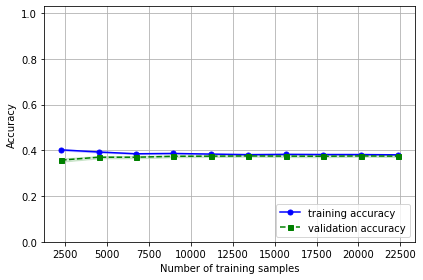

In [24]:
from sklearn.model_selection import learning_curve


pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(solver='liblinear', 
                                           penalty='l2', 
                                           random_state=1))

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_lr, # 학습곡선 그려줌
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.0, 1.03])
plt.tight_layout()
plt.show()